In [1]:
!pip install keras

In [2]:
!pip install tensorflow

## PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense

In [4]:
df = pd.read_csv("forestfires.csv")
df.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


# EDA

In [5]:
df.shape

(517, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
df2=df.copy()

In [8]:
df2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df2['month'] = le.fit_transform(df2['month'])
df2['day'] = le.fit_transform(df2['day'])
df2['size_category'] = le.fit_transform(df2['size_category'])

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [12]:
df2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [13]:
corr = df2.corr()
corr

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
month,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,...,-0.126642,-0.025078,-0.044577,0.010204,0.097065,0.031976,0.032664,0.167825,0.847124,-0.032559
day,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,...,-0.061222,-0.007678,0.030960,-0.008618,-0.084825,-0.056282,0.051802,-0.000325,-0.104068,-0.003550
FFMC,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.141131,-0.034504,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,-0.076800,0.052881,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001


In [14]:
df2.shape

(517, 31)

In [15]:
# Split the data into X and y
X = df2.iloc[:,0:30]
Y = df2['size_category']

In [16]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [18]:
# Split X and y into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

In [19]:
# Scale the numeric attributes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

In [20]:
model = Sequential()

In [21]:
model.add(Dense(12, input_dim=30,  activation='relu')) #1st layer
model.add(Dense(30,input_dim=12,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                372       
                                                                 
 dense_1 (Dense)             (None, 30)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 793
Trainable params: 793
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Fit the model
history = model.fit(X, Y, validation_split=0.3, epochs=250, batch_size=10)

Epoch 1/250
37/37 [==============================] - 1s 6ms/step - loss: 1.3692 - accuracy: 0.6482 - val_loss: 1.2862 - val_accuracy: 0.6731
Epoch 2/250
37/37 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.7396 - val_loss: 1.1713 - val_accuracy: 0.6859
Epoch 3/250
37/37 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.8006 - val_loss: 0.6297 - val_accuracy: 0.7949
Epoch 4/250
37/37 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.7756 - val_loss: 0.8268 - val_accuracy: 0.7436
Epoch 5/250
37/37 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8449 - val_loss: 0.6982 - val_accuracy: 0.7692
Epoch 6/250
37/37 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8837 - val_loss: 0.5522 - val_accuracy: 0.7949
Epoch 7/250
37/37 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8920 - val_loss: 0.5561 - val_accuracy: 0.7500
Epoch 8/250
3

Epoch 59/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9861 - val_loss: 0.1925 - val_accuracy: 0.9231
Epoch 60/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9723 - val_loss: 0.2634 - val_accuracy: 0.8910
Epoch 61/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9806 - val_loss: 0.2037 - val_accuracy: 0.9167
Epoch 62/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9889 - val_loss: 0.2479 - val_accuracy: 0.9167
Epoch 63/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9723 - val_loss: 0.1876 - val_accuracy: 0.9231
Epoch 64/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9695 - val_loss: 0.5030 - val_accuracy: 0.8205
Epoch 65/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9861 - val_loss: 0.2078 - val_accuracy: 0.9167
Epoch 

37/37 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9584 - val_loss: 0.1019 - val_accuracy: 0.9615
Epoch 117/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9861 - val_loss: 0.1051 - val_accuracy: 0.9423
Epoch 118/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9778 - val_loss: 0.2272 - val_accuracy: 0.9167
Epoch 119/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9806 - val_loss: 0.1344 - val_accuracy: 0.9487
Epoch 120/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9778 - val_loss: 0.1625 - val_accuracy: 0.9423
Epoch 121/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9834 - val_loss: 0.1729 - val_accuracy: 0.9359
Epoch 122/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9972 - val_loss: 0.1213 - val_accuracy: 0.9423
Epoch 123/250

37/37 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9917 - val_loss: 0.3911 - val_accuracy: 0.9038
Epoch 174/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9751 - val_loss: 0.0946 - val_accuracy: 0.9551
Epoch 175/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.1114 - val_accuracy: 0.9615
Epoch 176/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9889 - val_loss: 0.1691 - val_accuracy: 0.9359
Epoch 177/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9778 - val_loss: 0.1212 - val_accuracy: 0.9615
Epoch 178/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9861 - val_loss: 0.2014 - val_accuracy: 0.9423
Epoch 179/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9889 - val_loss: 0.1288 - val_accuracy: 0.9551
Epoch 180/250

37/37 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9889 - val_loss: 0.0826 - val_accuracy: 0.9615
Epoch 231/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9861 - val_loss: 0.2006 - val_accuracy: 0.9295
Epoch 232/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9861 - val_loss: 0.0995 - val_accuracy: 0.9679
Epoch 233/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9917 - val_loss: 0.1063 - val_accuracy: 0.9615
Epoch 234/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9972 - val_loss: 0.0932 - val_accuracy: 0.9615
Epoch 235/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9945 - val_loss: 0.1090 - val_accuracy: 0.9615
Epoch 236/250
37/37 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9945 - val_loss: 0.1036 - val_accuracy: 0.9679
Epoch 237/250

In [26]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 920us/step - loss: 0.0391 - accuracy: 0.9865
accuracy: 98.65%


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
history.history["accuracy"]

[0.6481994390487671,
 0.7396121621131897,
 0.8005540370941162,
 0.7756232619285583,
 0.8448753356933594,
 0.8836565017700195,
 0.8919667601585388,
 0.886426568031311,
 0.886426568031311,
 0.9030470848083496,
 0.8199446201324463,
 0.9058171510696411,
 0.9168975353240967,
 0.9335179924964905,
 0.9279778599739075,
 0.9335179924964905,
 0.9473684430122375,
 0.9445983171463013,
 0.9390581846237183,
 0.9141274094581604,
 0.9473684430122375,
 0.9362881183624268,
 0.9279778599739075,
 0.9473684430122375,
 0.9639889001846313,
 0.9584487676620483,
 0.9529085755348206,
 0.9667590260505676,
 0.9639889001846313,
 0.9778393507003784,
 0.9639889001846313,
 0.9750692248344421,
 0.9667590260505676,
 0.9722991585731506,
 0.9695290923118591,
 0.9556786417961121,
 0.9612188339233398,
 0.9722991585731506,
 0.9722991585731506,
 0.9584487676620483,
 0.9722991585731506,
 0.9529085755348206,
 0.9916897416114807,
 0.9639889001846313,
 0.950138509273529,
 0.9695290923118591,
 0.9889196753501892,
 0.9833794832229

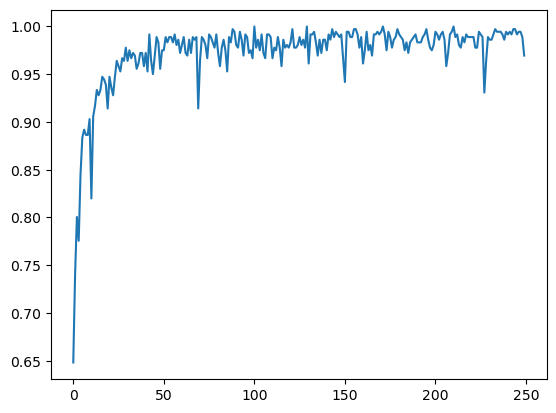

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

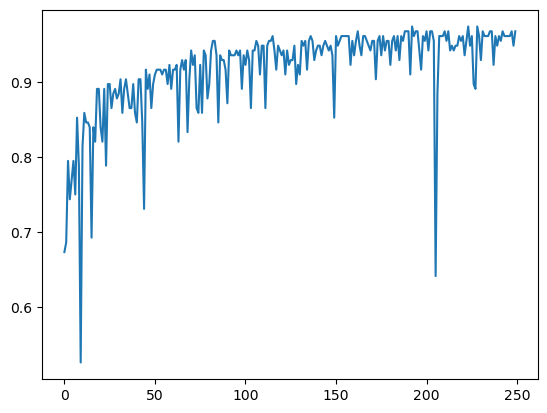

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

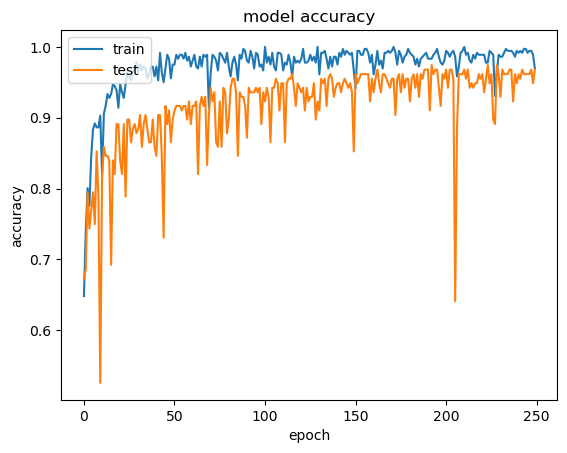

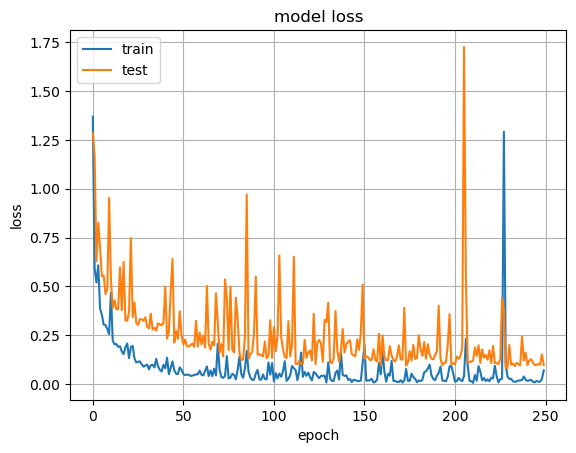

In [31]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

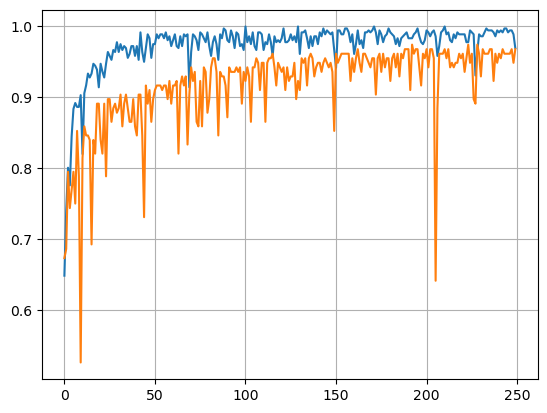

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.grid()

In [33]:
model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.9376 - accuracy: 0.5449


[0.9376393556594849, 0.5448718070983887]